An important electrical circuit, that has applications in radio recievers and television sets, is the RLC circuit. This consists in three basic components: a resistor $R$, a inductor $L$, and a capacitor $C$.

When the circuit is in series, and without any voltage source, the capacitor (with initial charge $q_0$) begins to discharge and the energy is dissipated by the resistor. One can then write the following equation for the charge as a function of time $q(t)$:

\begin{equation}
L\frac{d^2 q}{dt^2}+R\frac{dq}{dt}+\frac{q}{C}=0.
\end{equation}

Now for this exercise consider, all in S.I. units:

$L=50$ mH = $0.05$ Henry 

$R=10$ $\Omega$

$C=10$ $\mu$ F = $10^{-5}$ Faraday

$q(0)=q_0=1$ mC = 0.001 C

$I(0)=I_0=0.2$ A

Split Eq. (1) in two equations, being one corresponding to the current equation $I=\frac{dq}{dt}$, and solve the problem for the time between 0 and $0.03$ seconds.

Name: Simon Machuca Johansson

Numeric solution
======

To start solving this equation, we need to first split this 2nd order differential equation into two 1st order equations.
\begin{equation} 
I = \frac{dq}{dt}
\end{equation}

\begin{equation} 
L\frac{dI}{dt}+RI+\frac{q}{C}=0 \iff \frac{-RI-\frac{q}{C}}{L} = \frac{dI}{dt}
\end{equation}


In [3]:
## Imports
import numpy as np ## Numpy
import matplotlib.pyplot as plt ## Matplotlib: to plot the result

In [131]:
#define constants and functions
L = 0.05
R = 10
C = 10**(-5)
start_q = 0.001
start_I = 0.2
start_t = 0
trg_t = 0.03
step = 0.00001
f1 = lambda _, I : I
f2 = lambda q, I : (-(R*I) - (q/C))/L

In [132]:
def euler(q, I, step, func):
    return step * func(q, I)

def iter_over_euler(step, t_array):
    q_array = []
    I_array = []
    current_q = start_q
    current_I = start_I
    for t in t_array:
        q_array.append(current_q)
        I_array.append(current_I)

        tmp_q = current_q + euler(current_q, current_I, step, f1)
        current_I += euler(current_q, current_I, step, f2)
        current_q = tmp_q #Calculating I needs the use of "the previous q"

    return I_array

print(f"Value of I(0.03) using eulers method: {iter_over_euler(step, np.arange(start_t, trg_t + step, step))[-1]} A")

Value of I(0.03) using eulers method: 0.09517840222480514 A


Value of y(0.5) using rk method: 0.9003450975860798 m


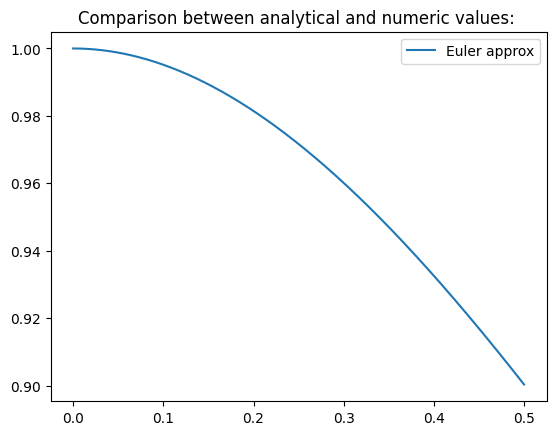

In [12]:
h = 0.001
start_t = 0
start_v = 0
trg_t = 0.5
start_y = 1

# slopes
k1y = lambda t, y, v: v
k1v = lambda t, y, v: t - y**2

k2y = lambda t, y, v, h: v + (h/2) * k1v(t, y, v)
k2v = lambda t, y, v, h: (t + h/2) - (y + (h/2) * k1y(t, y, v))**2

def iter_over_rk(step, t_array):
    q_array = []
    I_array = []
    current_q = start_y
    current_I = start_v

    for t in t_array:
        q_array.append(current_q)
        I_array.append(current_I)

        # RK2 updates
        tmp_q = current_q + step * k2y(t, current_q, current_I, step)
        tmp_I = current_I + step * k2v(t, current_q, current_I, step)

        current_q, current_I = tmp_q, tmp_I

    return q_array, I_array

t_array = np.arange(start_t, trg_t + h, h)
q_vals, I_vals = iter_over_rk(h, t_array)

print(f"Value of y(0.5) using rk method: {q_vals[-1]} m")
plt.plot(t_array,q_vals, label="Euler approx")    
plt.legend()
plt.title("Comparison between analytical and numeric values: ")
plt.show()

Analytical solution
=========

We make the following ansatz:
\begin{equation}
q(t) = e^{rt}
\end{equation}

From this we get:
\begin{equation}
Lr^2 + Rr + \frac{1}{C} = 0 \iff r = \frac{-R \pm \sqrt{R^2 - 4L/C}}{2L}
\end{equation}

We then get:
\begin{gather}
r = -\alpha \pm i\omega, \\ 
where \quad \alpha = \frac{R}{2L}, \quad \omega = \sqrt{\frac{1}{LC} - (\frac{R}{2L})^2}
\end{gather}

I.E.
\begin{equation}
q(t) = e^{-\alpha t}(C_1e^{\omega t} + C_2e^{-\omega t}) \iff q(t) = e^{-\alpha t}(A\cos(\omega t) + B\sin(\omega t))
\end{equation}

From $\frac{dq}{dt} = I$, we get:
\begin{equation}
I(t) = e^{-\alpha t}((-\alpha A + B \omega)\cos(\omega t)+ (-\alpha B - A\omega)\sin(\omega t))
\end{equation}

A and B are given with initial conditions $q(0) = 0.001C$ and $I(0) = 0.2A$:
\begin{gather}
A = 0.001 \\
0.2 = -\alpha A + B \omega \iff B = \frac{0.2 + 0.001\alpha}{\omega}
\end{gather}



In [133]:
#Define analytical function and calculate
alpha = R/(2*L)
omega = np.sqrt((1/(L*C))-((R/(2*L))**2))
A = start_q
B = (start_I + (start_q*alpha))/omega

def f_analytical(t):
    exponent = -alpha * t
    cos_coeff = (-alpha * A) + (B*omega)
    cos = np.cos(omega*t)
    sin_coeff = (-alpha*B) - (A*omega)
    sin = np.sin(omega*t)
    cos_term = cos_coeff * cos
    sin_term = sin_coeff * sin
    return np.exp(exponent) * (cos_term + sin_term)

print(f"Value of I(0.03) analytically: {f_analytical(0.03)} A")

Value of I(0.03) analytically: 0.07008743573787395 A


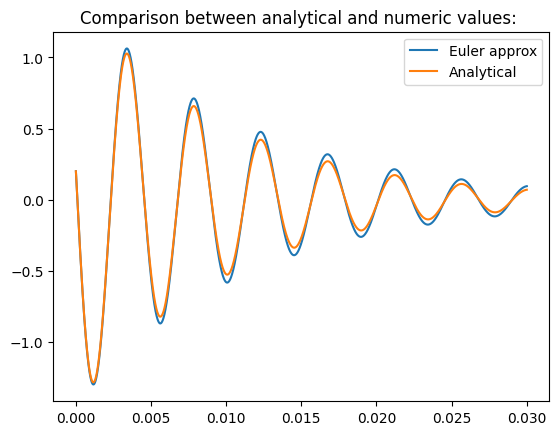

In [134]:
#Compare
def analytical_values(t_array):
    I_array = []
    for t in t_array:
        I_array.append(f_analytical(t))

    return I_array

t_array = np.arange(start_t, trg_t + step, step)
plt.plot(t_array, iter_over_euler(step, t_array), label="Euler approx")    
plt.plot(t_array, analytical_values(t_array), label="Analytical")
plt.legend()
plt.title("Comparison between analytical and numeric values: ")
plt.show()